## Binary classification

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [18]:
aircon=pd.read_csv('./data/aircon.csv')

In [19]:
sample=[[35,40],
[39,60],
[15,30],
[28,80],
[27,30]]

In [20]:
data_x=aircon.iloc[:,0:-1]
data_y = aircon.iloc[:,[-1]]

In [21]:
print(data_x.shape)
print(data_y.shape)

(64, 2)
(64, 1)


In [22]:
def standard(x):
    return (x - np.mean(x)) / np.std(x)

for i in range(2):
    data_x.iloc[:, i]=standard(data_x.iloc[:, i])

In [23]:
x=tf.placeholder(tf.float32, shape=[None,2])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+ (1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)


cost: 0.33472434 
accuracy: 0.9
예측 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


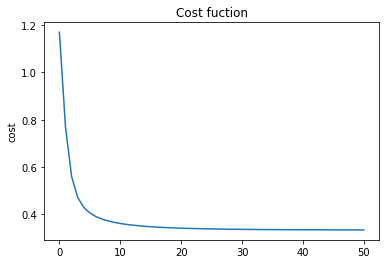

In [24]:
train_data_x, test_data_x, train_data_y, test_data_y = train_test_split(data_x,data_y, test_size=0.3, random_state=0)
predicted=tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))
a=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv,_=sess.run([cost,train],feed_dict={x:train_data_x,y:train_data_y})
        if step%200 == 0:
            a.append(cv)
    pv,av=sess.run([predicted,accuracy],feed_dict={x:test_data_x,y:test_data_y})
    print("cost:",cv, "\naccuracy:",av)
    pv_test=sess.run(predicted, feed_dict={x:sample})
    print('예측',pv_test)
a=pd.Series(a)
plt.plot(a)
plt.title('Cost fuction')
plt.ylabel('cost')
plt.show()

## Knn

In [25]:
b=[]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_data_x,train_data_y)
    prediction=model.predict(test_data_x)
    b.append(metrics.accuracy_score(prediction,test_data_y))

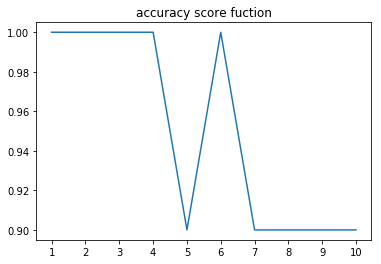

accuracy_score: [1.  1.  1.  1.  0.9 1.  0.9 0.9 0.9 0.9] 
max accuracy_score:  1.0


In [26]:
b=pd.Series(b)
plt.plot(range(1,11),b)
plt.xticks(range(1,11))
plt.title('accuracy score fuction')
plt.show()
print('accuracy_score:',b.values,'\nmax accuracy_score: ',b.values.max())

## Label encoding #1

In [27]:
iris=pd.read_csv('./data/iris.csv')
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [28]:
def Species_incoding():
    iris['Species'].replace(['setosa','versicolor','virginica'],
                            ['0','1','2',],inplace=True)
def Species_decoding():
    iris['Species'].replace(['0','1','2',],
                            ['setosa','versicolor','virginica'],inplace=True)

## Label encoding #2

In [29]:
from sklearn import preprocessing
iris['Species_new']=preprocessing.LabelEncoder().fit_transform(iris['Species'])

## Softmax

In [37]:
zoo=pd.read_csv('./data/data-04-zoo.csv')

In [38]:
zoo_data=zoo.iloc[18:,:-1]
zoo_target=zoo.iloc[18:,[-1]]

In [40]:
zoo_target['one_hot_0']=zoo_target.iloc[:,0].apply(lambda x: 1 if x==0 else 0)
zoo_target['one_hot_1']=zoo_target.iloc[:,0].apply(lambda x: 1 if x==1 else 0)
zoo_target['one_hot_2']=zoo_target.iloc[:,0].apply(lambda x: 1 if x==2 else 0)
zoo_target['one_hot_3']=zoo_target.iloc[:,0].apply(lambda x: 1 if x==3 else 0)
zoo_target['one_hot_4']=zoo_target.iloc[:,0].apply(lambda x: 1 if x==4 else 0)
zoo_target['one_hot_5']=zoo_target.iloc[:,0].apply(lambda x: 1 if x==5 else 0)
zoo_target['one_hot_6']=zoo_target.iloc[:,0].apply(lambda x: 1 if x==6 else 0)
zoo_target=zoo_target.iloc[:,1:]

In [41]:
zoo_target

,one_hot_0,one_hot_1,one_hot_2,one_hot_3,one_hot_4,one_hot_5,one_hot_6
18,1,0,0,0,0,0,0
19,1,0,0,0,0,0,0
20,0,0,0,1,0,0,0
21,1,0,0,0,0,0,0
22,1,0,0,0,0,0,0
23,1,0,0,0,0,0,0
24,1,0,0,0,0,0,0
25,0,0,0,1,0,0,0
26,0,0,0,1,0,0,0
27,1,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
zoo_target=onehot.fit_transform(zoo_target).toarray() 

In [34]:
train_data_x, test_data_x, train_data_y, test_data_y = train_test_split(zoo_data,zoo_target, test_size=0.3, random_state=0)

#one_hot encoding

predict: [4 3 3 0 0 0 1 3 0 0 6 0 1 6 3 5 0 5 1 3 1 2 0 1 0 0 0 1 3 3 3] 
accurcy: 0.9677419


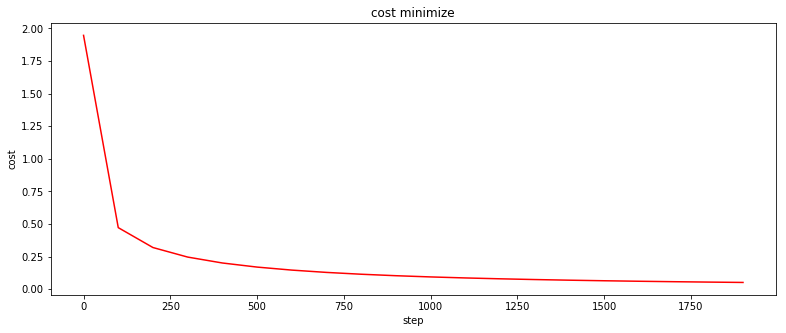

In [35]:
x=tf.placeholder(tf.float32,[None,16])
w=tf.Variable(tf.zeros([16,7]))
b=tf.Variable(tf.zeros([7]))
y_= tf.placeholder(tf.float32,[None,7])

hf=tf.matmul(x,w)+b
yhat=tf.nn.softmax(hf)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hf,labels=y_))
op=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#axis = 1 가장 안쪽의 1차원배열
predict =  tf.argmax(hf, axis=1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(yhat,axis=1),tf.argmax(y_,axis=1)),dtype=tf.float32)) #argmax: 인수 최댓값 출력

x_index=[]
y_index=[]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2000):
        _,costs=sess.run([op,cost], feed_dict={x:train_data_x,y_:train_data_y})
        if step % 100 == 0:
            x_index.append(step)
            y_index.append(costs)
    
    predict, accuracy= sess.run([predict,accuracy], feed_dict={x:test_data_x,y_:test_data_y})
    print("predict:",predict,'\naccurcy:',accuracy)
    
plt.figure(figsize=(13, 5))
plt.title('cost minimize')
plt.xlabel("step")
plt.ylabel("cost")
plt.plot(x_index,y_index, "r-")